<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_05_aes/AEs_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uso de Autoencoders (AEs)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

Aula 05: AEs

by: Rafael G. Mantovani

---

# 1. Gerando um AE simples 

enconder = 1 camada densa

decoder  = 1 camada densa de tamanho igual às entradas


In [ ]:
# import de todos os módulos necessários para o experimento 

# manipulação de números de ponto flutuante
import numpy as np

# manipulação/definição de DL e NNs
import keras

# carregando dataset MNIST (via keras)
from keras.datasets import mnist

# plots via matplotlib
import matplotlib.pyplot as plt

In [ ]:
# definir um seed para reprodução dos experimentos
np.random.seed(42)

In [ ]:
# lendo os conjuntos de treinamento (x_train) e teste (x_test)
# nesse exemplo iremos descartar os labels, pois estamos interessados apenas
# nos processos de codificação/decodificação das imagens
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Vamos normalizar todos os valores (pixels) entre 0 e 1
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

# aqui achatamos o sinal, cada imagem 28 x 28 vira um vetor de 784 valores
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# checando a dimensao dos dados
print('* Dimensões do conj treinamento: ', x_train.shape)
print('* Dimensões do conj teste:       ',x_test.shape)

* Dimensões do conj treinamento:  (60000, 784)
* Dimensões do conj teste:        (10000, 784)


In [ ]:
# Definir o tamanho das nossas representações codificadas
# (codings, ou representações latentes)
# 32 features extraídas de 784 valores
encoding_dim = 32

# numero de epocas para os experimentos
exp_epochs = 30

In [ ]:
# definir um encoder, que recebe como entrada o sinal já "achatado", 
# e possui apenas uma camada densa com 32 neurônios (codings),
# A função de ativação de cada neurônio é do tipo ReLU
encoder = keras.models.Sequential(name = "encoder",
    layers = [keras.layers.Dense(encoding_dim, activation='relu', input_shape = [784])
])

# imprimindo o modelo criado
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# definir um decoder, que recebe como entrada um vetor com 32 valores 
# numéricos (codings), e recria as inputs (saida = 784 valores)
# a função de ativação dos neurônios é sigmoidal
decoder = keras.models.Sequential(name = "decoder", 
    layers = [keras.layers.Dense(784, activation= 'sigmoid', input_shape = [32])
])

# imprimindo o modelo criado
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Agora podemos criar o autoencoder combinando enconder + decoder
autoencoder = keras.models.Sequential(
    name = "autoencoder", 
    layers = [encoder, decoder]
)

# imprimindo o modelo
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 32)                25120     
_________________________________________________________________
decoder (Sequential)         (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Vamos configurar as opções de treinamento do nosso modelo (autoencoder)
# usaremos o algoritmo Adam, e como função de custo (loss function)
# a entropia binária - medida recomendada para classificação binária
# (é a mesma que temos descrita nos slides de aula)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Configurado o aprendizado, precisamos treinar o modelo
# vamos armazenar todas as informações de treinamento na variável 
# 'autoencoder_history'
autoencoder_history = autoencoder.fit(
    # x = dados de treinamento (input data)
    x = x_train,
    # y = target / labels, aqui será x_train também, pois queremos reconstruir a entrada
    y = x_train,
    # épocas de treinamento
    epochs = exp_epochs,
    # número de amostras computadas para ter uma atualização do gradiente
    batch_size = 256,
    # embaralhar os exemplos de treinamento antes de cada época
    shuffle = True,
    # usamos o conjunto de teste como validação interna do treinamento
    validation_data =(x_test, x_test)
)

Epoch 1/30
235/235 [==============================] - 3s 11ms/step - loss: 0.3827 - val_loss: 0.1919
Epoch 2/30
235/235 [==============================] - 2s 11ms/step - loss: 0.1817 - val_loss: 0.1551
Epoch 3/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1507 - val_loss: 0.1349
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1330 - val_loss: 0.1230
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1221 - val_loss: 0.1147
Epoch 6/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1144 - val_loss: 0.1086
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1083 - val_loss: 0.1040
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1039 - val_loss: 0.1001
Epoch 9/30
235/235 [==============================] - 2s 11ms/step - loss: 0.1005 - val_loss: 0.0975
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.0981 - val_lo

In [ ]:
# realizar a codificação do conjunto de teste
encoded_imgs = encoder.predict(x_test)

# reconstruir as entradas por meio dos codings
decoded_imgs = decoder.predict(encoded_imgs)

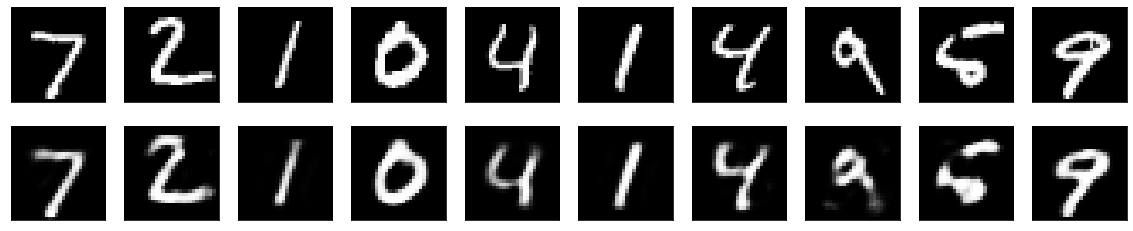

In [ ]:
# Verificar as reconstruções (outputs)
# Vamos visualizar as reconstruções com base nas imagens originais
# linha 1 - imagens originais
# linha 2 - imagens reconstruidas pelo AE simples

n = 10  #numero de imagens que queremos ver

plt.figure(figsize=(20, 4))
for i in range(n):
    
    # imagens originais
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # imagens reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---
# 2. Stacked Autoenconder (SAE)

A ideia aqui é repetir o processo, mas agora usando um Stacked Autoencoder (SAE). Isto é, vamos adicionar mais camadas tanto no encoder, como no decoder.
Neste exemplo iremos ter três camadas densas:
* 3 camadas com 128, 64 e 32 neurônios compondo o encoder. As funções de ativação são do tipo ReLU;
* 3 camadas com 64, 128 e 784 neurônios compondo o decoder. Todos os neurônios com funções ReLU, exceto os neurônios na última camada que possuem função de ativação do tipo sigmoidal.



In [ ]:
# Definir um encoder para sae, que recebe como entrada o sinal já "achatado", 
# com 784 valores, de depois de processa-los por três camadas, obtem
# uma representação latente de 32 valores (features)
# A função de ativação de cada neurônio é do tipo ReLU
sae_encoder = keras.models.Sequential(name = 'sae_encoder',
    layers = [
        keras.layers.Dense(128, activation = 'relu', input_shape = [784]),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
])

# imprime o modelo
sae_encoder.summary()

Model: "sae_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Definir um decoder para sae, que recebe como entrada uma representação 
# latente de 32 valores (features), e reconstroi as entradas por meio 
# de tres camadas de neurônios
# A função de ativação de cada neurônio é do tipo ReLU nas duas primeiras camadas
# A função de ativação dos neurônios da última camada são sigmoidais

sae_decoder = keras.models.Sequential(name = 'sae_decoder',
    layers = [
        keras.layers.Dense(64,  activation = 'relu', input_shape = [32]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(784, activation = 'sigmoid')
])

# imprime o modelo
sae_decoder.summary()

Model: "sae_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_56 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_57 (Dense)             (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Agora podemos criar o SAE combinando sae_enconder + sae_decoder
sae = keras.models.Sequential(
    name = 'sae',
    layers = [sae_encoder, sae_decoder]
)

# imprime o modelo
sae.summary()

Model: "sae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sae_encoder (Sequential)     (None, 32)                110816    
_________________________________________________________________
sae_decoder (Sequential)     (None, 784)               111568    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# como anteriormente, definindo as opções para treinamento do SAE
sae.compile(optimizer="adam", loss='binary_crossentropy')

In [ ]:
# Treinando o modelo e armazenando todas as informações de 
# treinamento na variável 'sae_history'

sae_history = sae.fit(
    x = x_train, 
    y = x_train,
    epochs = exp_epochs,
    batch_size = 256,
    shuffle = True,
    validation_data = (x_test, x_test)
)

Epoch 1/30
235/235 [==============================] - 5s 16ms/step - loss: 0.3445 - val_loss: 0.1697
Epoch 2/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1603 - val_loss: 0.1381
Epoch 3/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1361 - val_loss: 0.1267
Epoch 4/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1258 - val_loss: 0.1191
Epoch 5/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1178 - val_loss: 0.1124
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1128 - val_loss: 0.1086
Epoch 7/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1089 - val_loss: 0.1055
Epoch 8/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1054 - val_loss: 0.1032
Epoch 9/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1037 - val_loss: 0.1012
Epoch 10/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1018 - val_lo

In [ ]:
# Calculando as representacoes latentes para conjunto de testes (codings)
sae_encoded_imgs = sae_encoder.predict(x_test)
# reconstuindo as imagens usando os codings
sae_decoded_imgs = sae_decoder.predict(sae_encoded_imgs)

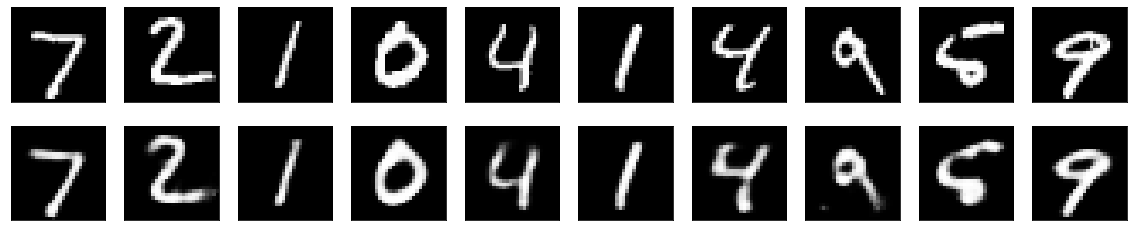

In [ ]:
# Verificar as reconstruções (outputs)
# Vamos visualizar as reconstruções com base nas imagens originais
# linha 1 - imagens originais
# linha 2 - imagens reconstruidas pelo SAE

n = 10  #numero de imagens que queremos ver
plt.figure(figsize=(20, 4))
for i in range(n):
    # mostrar imagens originais
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar imagens reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sae_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---
# 3. Denoising Autoenconder (DAE)

Aqui iremos estender o SAE adicionando uma camada de dropout no encoder.
A ideia deste processo é inserir ruídos nos dados de entrada e forçar o DAE
a aprender as representações mesmo com informações ausentes. No mais, os códigos são similares ao uso do SAE.


In [ ]:
# Definir um encoder para DAE, que recebe como entrada o sinal já "achatado", 
# com 784 valores
# 1. adiciona ruidos via Dropout com probabilidade de 50% para cada conexão
# 2. Processa o sinal alterado por três camadas, gerando 32 features
# A função de ativação de cada neurônio é do tipo ReLU

dae_encoder = keras.models.Sequential(
    name = 'dae_encoder',
    layers= [
        keras.layers.Dropout(rate = 0.5, input_shape = [784]),
        keras.layers.Dense(128, activation = 'relu', input_shape = [784]),
        keras.layers.Dense(64,  activation = 'relu'),
        keras.layers.Dense(32,  activation = 'relu')
])

# imprimindo o modelo
dae_encoder.summary()

Model: "dae_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Definindo decoder para DAE, tem a mesma estrutura do decoder do SAE
dae_decoder = keras.models.Sequential(name = 'dae_decoder',
    layers = [
        keras.layers.Dense(64,  activation = 'relu', input_shape = [32]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(784, activation = 'sigmoid')
])

# imprimindo modelo
dae_decoder.summary()

Model: "dae_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_54 (Dense)             (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Criando DAE pela junção dao dae_encoder + dae_decoder
dae = keras.models.Sequential(
    name = 'dae',
    layers = [dae_encoder, dae_decoder]
)

# imprimindo modelo
dae.summary()

Model: "dae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dae_encoder (Sequential)     (None, 32)                110816    
_________________________________________________________________
dae_decoder (Sequential)     (None, 784)               111568    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# definindo as opcoes para treinamento do DAE
dae.compile(optimizer="adam", loss='binary_crossentropy')

In [ ]:
# Treinando o modelo e armazenando todas as informações de 
# treinamento na variável 'dae_history'

dae_history = dae.fit(
    x = x_train, 
    y = x_train,
    epochs = exp_epochs,
    batch_size = 256,
    shuffle = True,
    validation_data = (x_test, x_test)
)

Epoch 1/30
235/235 [==============================] - 5s 19ms/step - loss: 0.3407 - val_loss: 0.1696
Epoch 2/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1677 - val_loss: 0.1414
Epoch 3/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1480 - val_loss: 0.1291
Epoch 4/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1387 - val_loss: 0.1223
Epoch 5/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1329 - val_loss: 0.1179
Epoch 6/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1287 - val_loss: 0.1149
Epoch 7/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1256 - val_loss: 0.1122
Epoch 8/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1229 - val_loss: 0.1098
Epoch 9/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1207 - val_loss: 0.1084
Epoch 10/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1190 - val_lo

In [ ]:
# Calculando as representacoes latentes para conjunto de testes (codings)
dae_encoded_imgs = dae_encoder.predict(x_test)
# reconstuindo as imagens usando os codings
dae_decoded_imgs = dae_decoder.predict(dae_encoded_imgs)

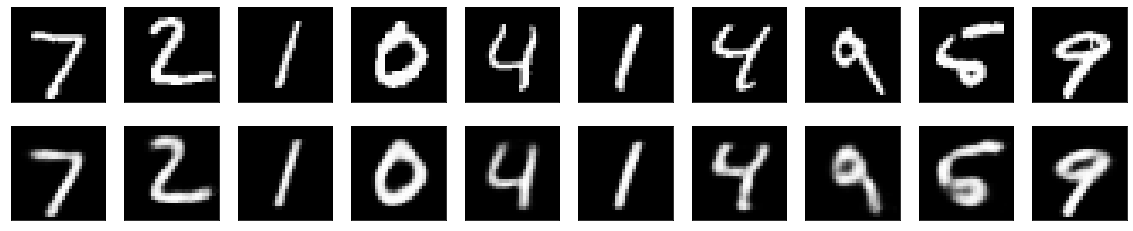

In [ ]:
# Verificar as reconstruções (outputs)
# Vamos visualizar as reconstruções com base nas imagens originais
# linha 1 - imagens originais
# linha 2 - imagens reconstruidas pelo DAE

n = 10  # Qtde de imagens para visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Mostrar imagens originais
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrar imagens reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(dae_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---
# 4. Comparando os diferentes modelos

Primeiro vamos dar uma olhada na curva de convergência com base no erro de treinamento dos três modelos: AE, SAE e DAE; isso ao longo da quantidade de épocas que usamos no experimento (30).

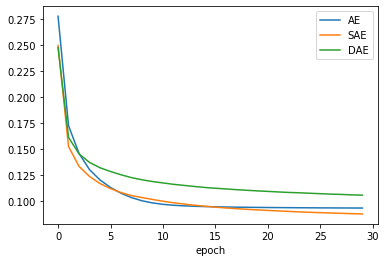

In [ ]:
# Comparação do erro de treinamento dos três diferentes modelos
# Azul - AE simples
# Laranja - SAE
# Verde  - DAE

plt.plot(autoencoder_history.history['loss'])
plt.plot(sae_history.history['loss'])
plt.plot(dae_history.history['loss'])
plt.xlabel('epoch')
plt.legend(['AE', 'SAE', 'DAE'], loc='upper right')
plt.show()

Vamos repetir agora o processo, mas olhando os erros de validação, que são os valores que realmente interessam para determinar a convergência ou não do algoritmo de treinamento dos AEs.

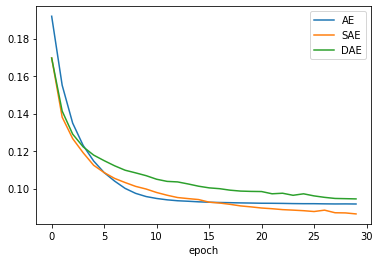

In [ ]:
# Comparação do erro de validação dos três diferentes modelos
# Azul - AE simples
# Laranja - SAE
# Verde  - DAE

plt.plot(autoencoder_history.history['val_loss'])
plt.plot(sae_history.history['val_loss'])
plt.plot(dae_history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['AE', 'SAE', 'DAE'], loc='upper right')
plt.show()

Por fim, vamos visualizar as reconstruções dos diferentes AEs para uma mesma quantidade de imagens. Temos quatro linhas com imagens:
 
 1. primeira linha mostra as imagens originais
 2. segunda linha mostra as reconstruções obtidas pelo AE simples
 3. terceita linha mostra as reconstruções obtidas pelo SAE
 4. última linha mostra as reconstruções obtidas pelo DAE
  

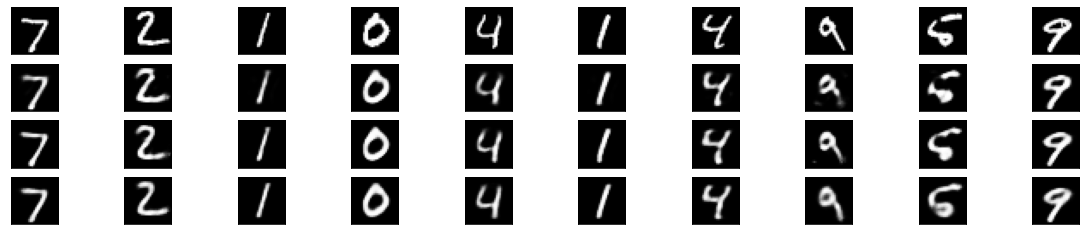

In [ ]:
# Comparando as saídas dos modelos de treinamos
# linha 1 - imagens originais
# linha 2 - reconstruções do AE simples
# linha 3 - reconstruções do SAE
# linha 4 - reconstruções do DAE

n = 10 # Qtde de imagens que queremos ver
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Mostrando as imagens originais
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrando as reconstruções do AE (AutoEncoder simples)
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrando as reconstruções do SAE (Stacked AutoEncoder)
    ax = plt.subplot(4, n, i + 1 + (2*n))
    plt.imshow(sae_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Mostrando as reconstruções do DAE (Denoising AutoEncoder)
    ax = plt.subplot(4, n, i + 1 + (3*n))
    plt.imshow(dae_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

O que acharam dos resultados? Qual teve melhor desempenho? Qual método conseguiu reconstruir os padrões de maneira satisfatória? Fica a reflexão como exercício de estudo.

Bons estudos :)